# Lecture 11

notebook made with Google Colab

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

## Exercise 11.1

we want to fit the following function:
$$f(x)=2x+1$$
in $[0,1]$ using a neural network. We will explore different training set sizes, epochs, batch sizes and noises. Our model will have only one layer of one neuron. (here verbose=0).

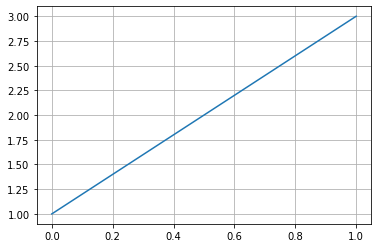

In [91]:
def f(x, sigma):
    y=(2*x)+1
    noise=np.random.normal(0,sigma)
    return y+noise

x=np.linspace(0,1, 100)
y=f(x,0)
plt.plot(x,y)
plt.grid(True)
plt.show()

In [0]:
def network():
    model=Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.summary()
    return model

def data(n_train, n_test, sigma):
    x_train=np.random.uniform(-1,1,n_train)
    y_train=f(x_train, sigma)
    x_test=np.random.uniform(-1,1,n_test)
    x_test.sort()
    y_test=f(x_test, sigma)
    return x_train, x_test, y_train, y_test

def train(model, x_train, x_test, y_train, y_test, batch, epochs):
    history = model.fit(x=x_train, y=y_train, 
          batch_size=batch, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_test, y_test), verbose=0)
    return history
  
def show_plot(model,history):
    plt.figure(figsize=(15,5))

    plt.subplot(121)
    #training history
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.yscale('log')
    plt.legend(['Train', 'Test'], loc='best')

    plt.subplot(122)
    x_predicted = np.random.uniform(0,1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', label='predicted')
    plt.plot(x, y, label='true')
    plt.legend(loc='best')
    plt.grid(True)

    plt.show()

### model 0
we start with 100 training data and with no noise. We train the model for 30 epochs, with batches of 32 elements.

In [104]:
x_train, x_test, y_train, y_test=data(100,10,0)
model_0=network()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=train(model_0, x_train, x_test, y_train, y_test, batch=32, epochs=30)

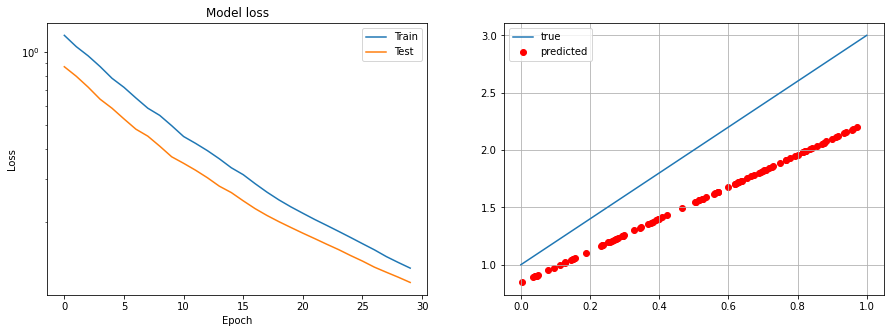

In [106]:
show_plot(model_0, history)

### model 1
We add some noise ($\sigma=0,2$) and use 400 points.

In [107]:
x_train, x_test, y_train, y_test=data(400,40,0.2)
model_1=network()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=train(model_1, x_train, x_test, y_train, y_test, batch=32, epochs=30)

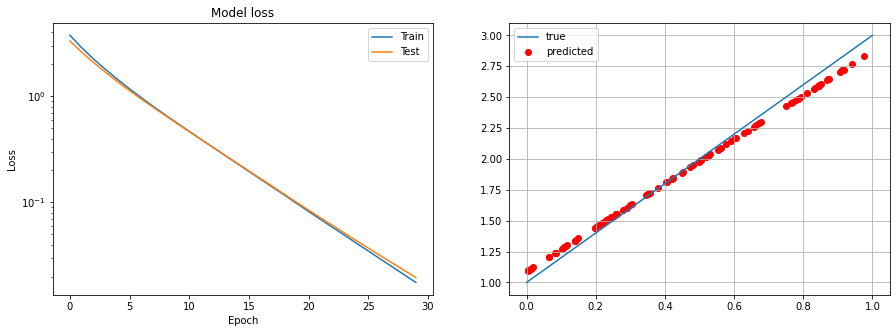

In [109]:
show_plot(model_1, history)

### model 2
more noise ($\sigma=0,5$) and 40 epochs.

In [117]:
x_train, x_test, y_train, y_test=data(400,40,0.5)
model_2=network()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=train(model_2, x_train, x_test, y_train, y_test, batch=32, epochs=40)

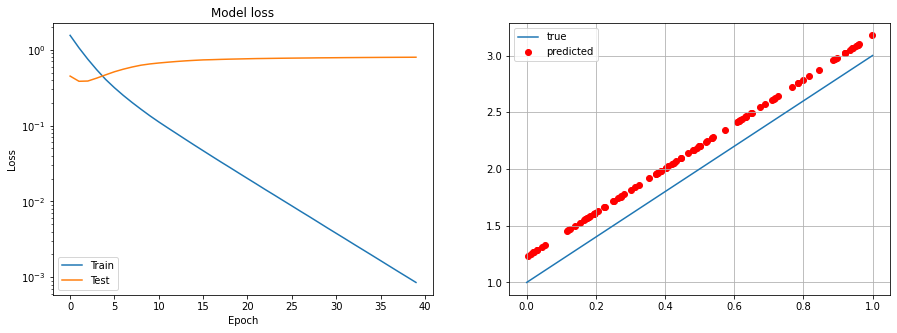

In [119]:
show_plot(model_2, history)

## Exercise 11.2

we try to fit the following third grade polinomial:
$$f(x)=4-3x-2x^2+3x^3$$
in $[-1,1]$ and see how well our fit in the range $[-\frac{3}{2},\frac{3}{2}]$. We will use different architectures. Each network will have at least tree layers: input, with only one neuron, one hidden, and output, with one neuron and linear activation. (again, verbose=0).

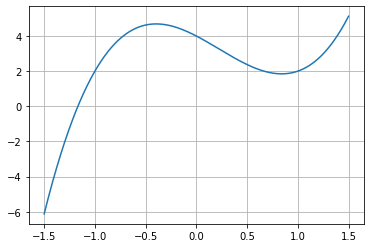

In [120]:
def f(x):
    return 4-3*x-2*(x**2)+3*(x**3)

x=np.linspace(-1.5,1.5, num=1000)
y=f(x)

plt.plot(x,y)
plt.grid(True)
plt.show()

In [0]:
def network(layers, activation):
    model=tf.keras.Sequential()
    model.add(Dense(layers[0], input_shape=(1,), activation=activation[0]))  #first hidden layer
    for i in range(1,len(layers)):
        model.add(Dense(layers[i], activation=activation[i]))  #hidden

    model.add(Dense(1))  #output layer
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.summary()
    return model

def data(n_train, n_test):
    x_train=np.random.uniform(-1,1,n_train)
    y_train=f(x_train)
    x_test=np.random.uniform(-1,1,n_test)
    x_test.sort()
    y_test=f(x_test)

    return x_train, x_test, y_train, y_test

def train(model, x_train, x_test, y_train, y_test, batch, epochs):
    history = model.fit(x=x_train, y=y_train, 
          batch_size=batch, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_test, y_test), verbose=0)
    return history
  
def show_plot(model,history):
    plt.figure(figsize=(15,7.5))

    plt.subplot(121)
    #training history
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.yscale('log')
    plt.legend(['Train', 'Test'], loc='best')

    plt.subplot(122)
    x_predicted = np.random.uniform(-1.5, 1.5, 1000)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', label='predicted')
    plt.plot(x, y, label='true')
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.show()

### model 0
We start with a simple network, with tree neurons and a sigmoid in the hidden layer. The training set has 1000 elements.

In [122]:
x_train, x_test, y_train, y_test=data(1000,100)

layer=[3]
activation=['sigmoid']
model_0=network(layer,activation)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=train(model_0, x_train, x_test, y_train, y_test, batch=20, epochs=50)

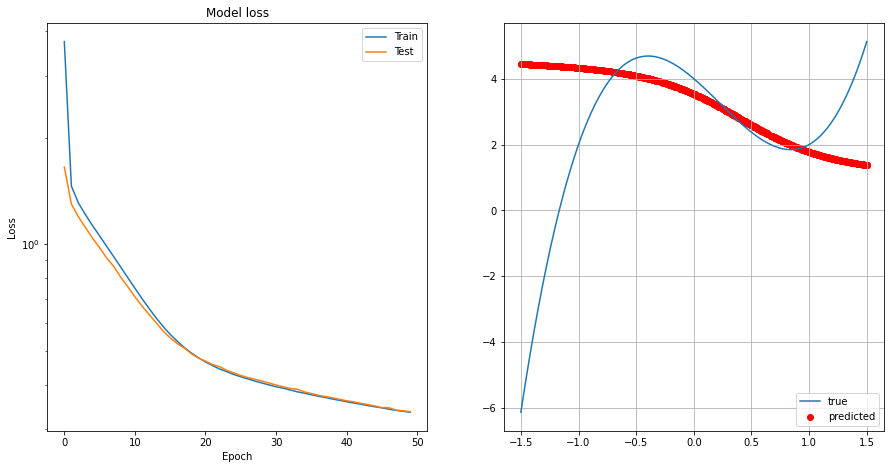

In [130]:
show_plot(model_0, history)

### model 1
We simply use more data (5000) and a longer training.

In [131]:
x_train, x_test, y_train, y_test=data(5000,500)

layer=[3]
activation=['sigmoid']
model_1=network(layer,activation)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=train(model_1, x_train, x_test, y_train, y_test, batch=100, epochs=50)

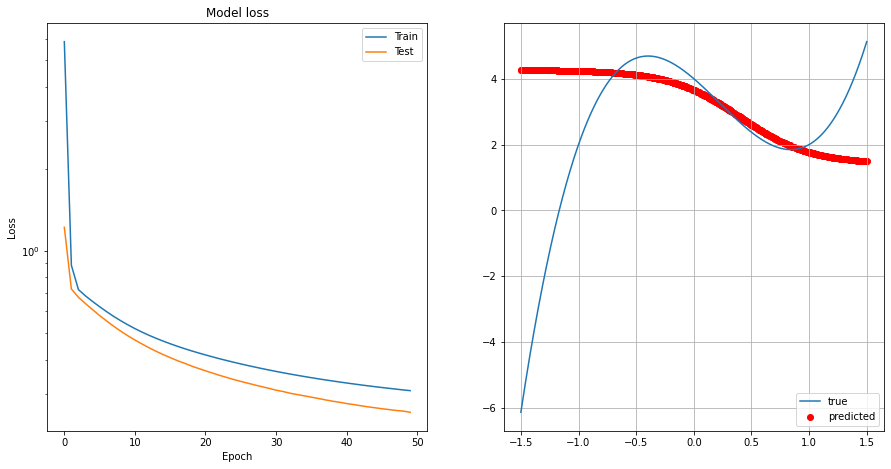

In [133]:
show_plot(model_1, history)

### model 2
We increase the width of the hidden layer, using 10 neurons.

In [134]:
x_train, x_test, y_train, y_test=data(5000,500)

layer=[10]
activation=['sigmoid']
model_1=network(layer,activation)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=train(model_2, x_train, x_test, y_train, y_test, batch=100, epochs=50)

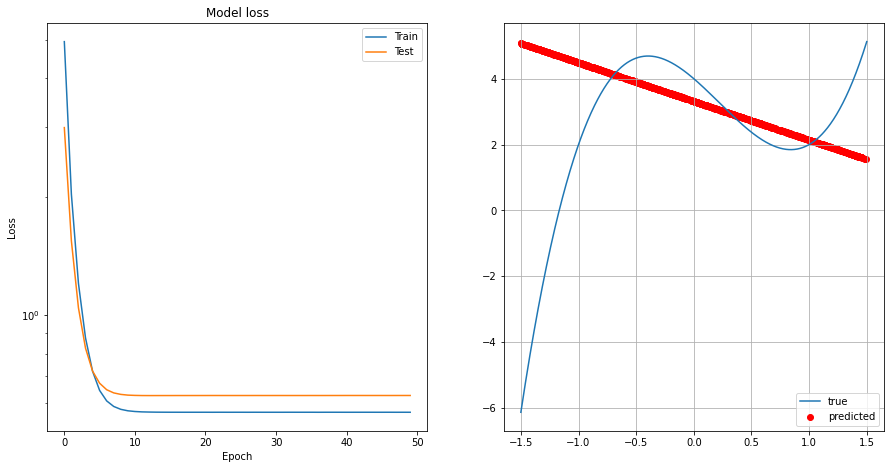

In [136]:
show_plot(model_2, history)

### model 3
We use 3 hidden layer of 10 neurons, with sigmoid.

In [137]:
x_train, x_test, y_train, y_test=data(5000,500)

layer=[10, 10, 10]
activation=['sigmoid','sigmoid', 'sigmoid']
model_3=network(layer,activation)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_53 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_54 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=train(model_3, x_train, x_test, y_train, y_test, batch=100, epochs=50)

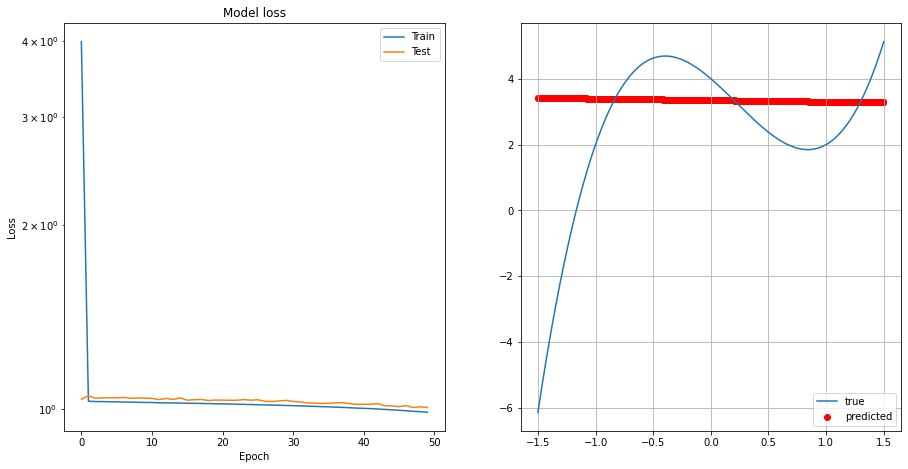

In [139]:
show_plot(model_3, history)

### model 4
The two previous models were not very good, probably because we used few data for the training. We now use $5\times10^4$ data, 100 epochs and build a network with three hidden layers of 50 neurons.

In [140]:
x_train, x_test, y_train, y_test=data(50000,500)

layer=[50, 50, 50]
activation=['sigmoid','sigmoid', 'sigmoid']
model_4=network(layer,activation)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_57 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_58 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 51        
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=train(model_4, x_train, x_test, y_train, y_test, batch=1000, epochs=100)

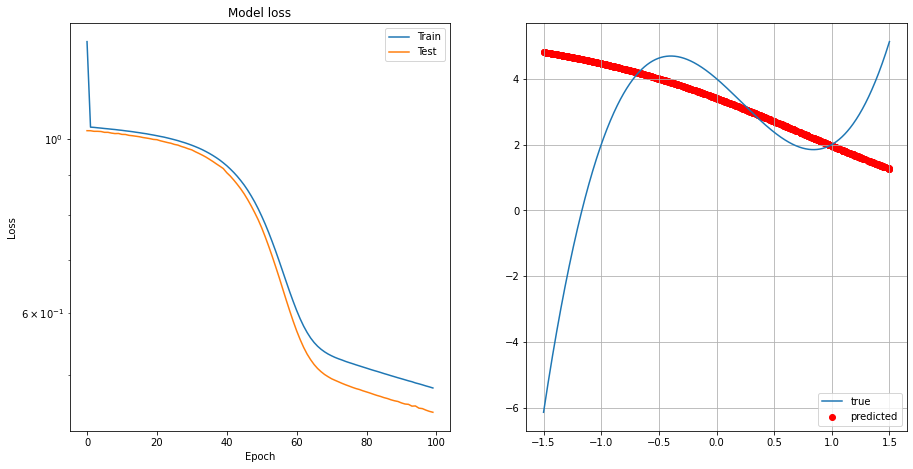

In [142]:
show_plot(model_4, history)

### model 5
We add another layer and double the training set. The model fit perfecly the polinomail inside the interval, but can't be used to make predictions outside.

In [143]:
x_train, x_test, y_train, y_test=data(100000,1000)

layer=[50, 50, 50, 50]
activation=['sigmoid','sigmoid', 'sigmoid', 'sigmoid']
model_5=network(layer,activation)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_61 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_62 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_63 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 51        
Total params: 7,801
Trainable params: 7,801
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=train(model_5, x_train, x_test, y_train, y_test, batch=100, epochs=100)

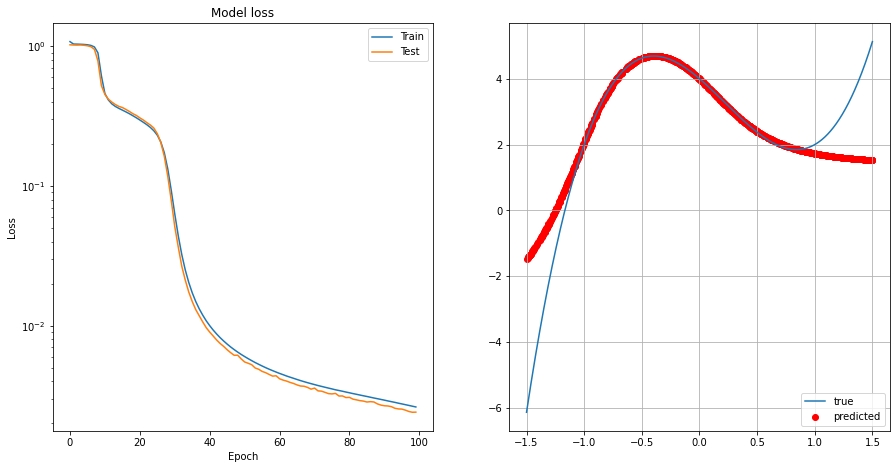

In [145]:
show_plot(model_5, history)

### model 6
We finally try two linear models. The first is similar to model 3.

In [146]:
x_train, x_test, y_train, y_test=data(5000,500)

layer=[10, 10, 10]
activation=['linear', 'linear', 'linear']
model_6=network(layer,activation)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_66 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_67 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=train(model_6, x_train, x_test, y_train, y_test, batch=100, epochs=50)

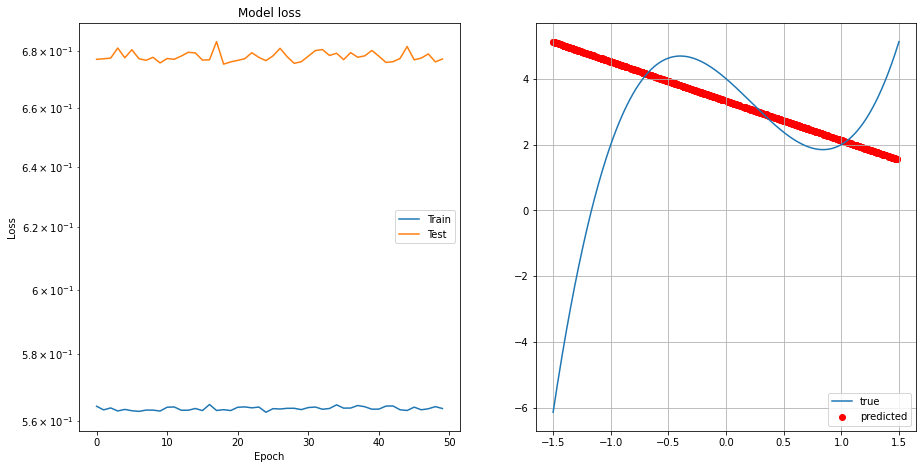

In [150]:
show_plot(model_6, history)

### model 7
The second is similar to model 5. None of them is good.

In [151]:
x_train, x_test, y_train, y_test=data(100000,1000)

layer=[50, 50, 50, 50]
activation=['linear', 'linear', 'linear', 'linear']
model_7=network(layer,activation)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_70 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_71 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_72 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 51        
Total params: 7,801
Trainable params: 7,801
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=train(model_7, x_train, x_test, y_train, y_test, batch=100, epochs=100)

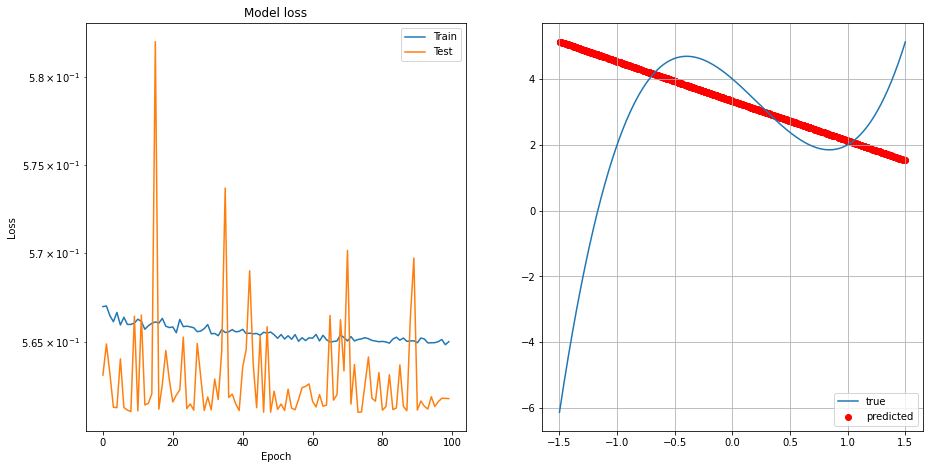

In [154]:
show_plot(model_7, history)

## Exercise 11.3
We want to fit the following 2D function:
$$f(x)=sin(x^2+y^2)$$
in $x \in [-\frac{3}{2},\frac{3}{2}]$ and $y \in [-\frac{3}{2},\frac{3}{2}]$, then we try to make some predictions in $x \in [-2,2]$, $y \in [-2,2]$. We use 10 hidden layers of 30 neurons with an elu as atcivation function. We train the model with $10^5$ data and for 100 epochs. The model is good inside the training interval, but can't make predictions outside of it.

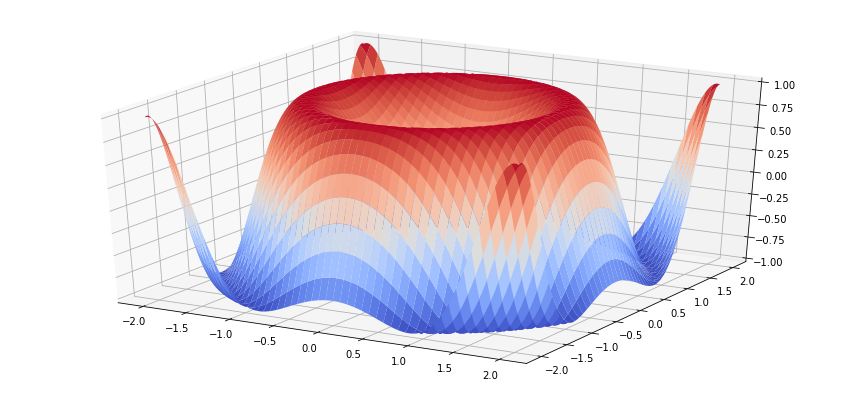

In [47]:
def f(x,y):
    return np.sin(x**2+y**2)

x=np.linspace(-2, 2, num=5000)
y=np.linspace(-2, 2, num=5000)
x,y = np.meshgrid(x, y)
z=f(x,y)

fig=plt.figure(figsize=(15,7))
ax=fig.gca(projection='3d')
ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=True)
plt.show()

In [0]:
def network(layers, activation):
    model=tf.keras.Sequential()
    model.add(Dense(layers[0], input_shape=(2,), activation=activation[0]))  #first hidden layer
    for i in range(1,len(layers)):
        model.add(Dense(layers[i], activation=activation[i]))  #hidden

    model.add(Dense(1))  #output layer
    model.compile(optimizer='Adam', loss='mse', metrics=['mse'])
    model.summary()
    return model

def data(n_train, n_test):
    x_train = np.random.rand(n_train,2) * 3 - 1.5
    x_test = np.random.rand(n_test,2) * 3 - 1.5
    y_train = f(x_train[:,0],x_train[:,1])
    y_test = f(x_test[:,0],x_test[:,1])
    return x_train, x_test, y_train, y_test

def train(model, x_train, x_test, y_train, y_test, batch, epochs):
    history = model.fit(x=x_train, y=y_train, 
          batch_size=batch, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_test, y_test))
    return history
  
def show_plot(model, history):
    fig=plt.figure(figsize=(15,6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.yscale('log')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
  
    fig=plt.figure(figsize=(15,10))
    x1_predicted = np.random.uniform(-2,2, size=10000)
    x2_predicted = np.random.uniform(-2,2, size=10000)
    x_predicted = np.transpose(np.array([x1_predicted, x2_predicted]))
    y_predicted = model.predict(x_predicted)
    ax=fig.gca(projection='3d')
    ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=0.7)
    ax.scatter(x1_predicted, x2_predicted, y_predicted, color='green')
    plt.show()

In [70]:
x_train, x_test, y_train, y_test=data(100000,1000)

layer=[30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
activation=['elu', 'elu', 'elu', 'elu', 'elu', 'elu', 'elu', 'elu', 'elu', 'elu']
model=network(layer,activation)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 30)                90        
_________________________________________________________________
dense_29 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_30 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_31 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_32 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_33 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_34 (Dense)             (None, 30)               

In [71]:
history=train(model, x_train, x_test, y_train, y_test, batch=1000, epochs=100)

Epoch 1/100
100/100 [==============================] - 1s 7ms/step - loss: 0.1458 - mse: 0.1458 - val_loss: 0.0988 - val_mse: 0.0988
Epoch 2/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 3/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4/100
100/100 [==============================] - 1s 7ms/step - loss: 9.8553e-04 - mse: 9.8553e-04 - val_loss: 5.1339e-04 - val_mse: 5.1339e-04
Epoch 5/100
100/100 [==============================] - 1s 6ms/step - loss: 4.9748e-04 - mse: 4.9748e-04 - val_loss: 3.7052e-04 - val_mse: 3.7052e-04
Epoch 6/100
100/100 [==============================] - 1s 6ms/step - loss: 4.0244e-04 - mse: 4.0244e-04 - val_loss: 3.0489e-04 - val_mse: 3.0489e-04
Epoch 7/100
100/100 [==============================] - 1s 6ms/step - loss: 3.6232e-04 - mse: 3.6232e-04 - val_loss: 3.0750e-04 - val_mse: 3.0750e-04
Epoch

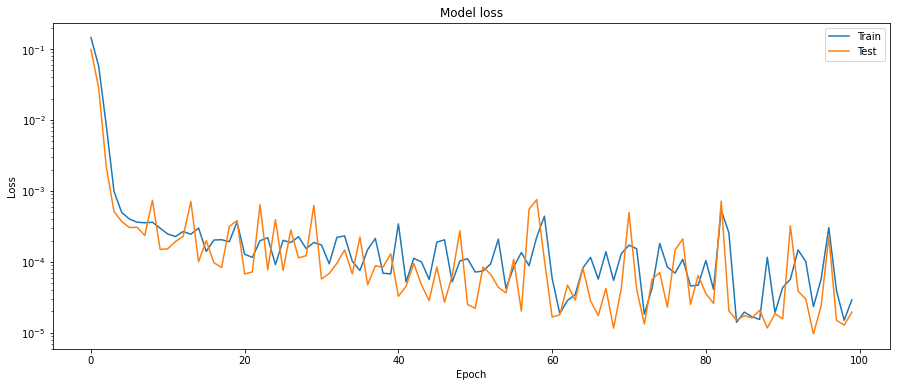

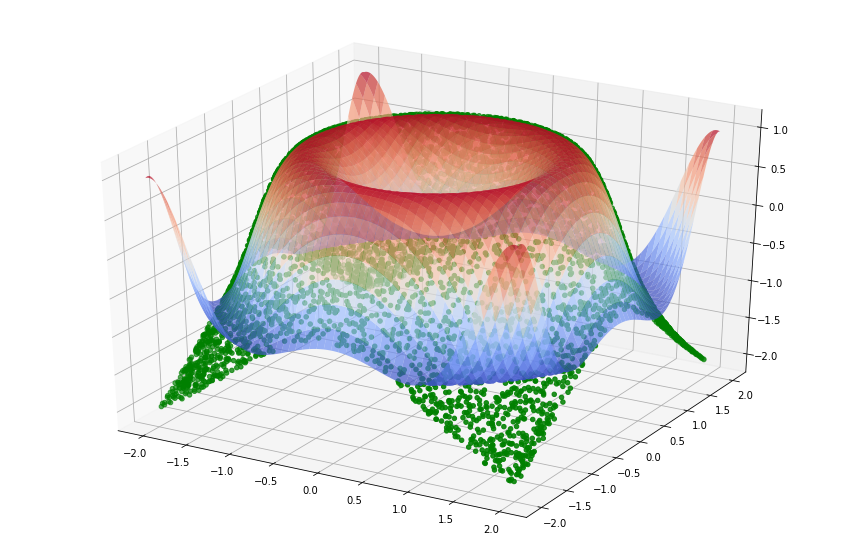

In [72]:
show_plot(model, history)